In [15]:
import pandas as pd

In [16]:
data_frame=pd.read_csv('dataset.csv')
data_frame.head()

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
0,58,management,married,tertiary,unknown,5,may,261,1,unknown,no
1,44,technician,single,secondary,unknown,5,may,151,1,unknown,no
2,33,entrepreneur,married,secondary,unknown,5,may,76,1,unknown,no
3,47,blue-collar,married,unknown,unknown,5,may,92,1,unknown,no
4,33,unknown,single,unknown,unknown,5,may,198,1,unknown,no


In [17]:
# Descriptive statistics for numerical features
numerical_features = ['age', 'day', 'mon', 'dur', 'num_calls']
descriptive_stats = data_frame[numerical_features].describe()
print(descriptive_stats)


                age           day           dur     num_calls
count  45211.000000  45211.000000  45211.000000  45211.000000
mean      40.936210     15.806419    258.163080      2.763841
std       10.618762      8.322476    257.527812      3.098021
min       18.000000      1.000000      0.000000      1.000000
25%       33.000000      8.000000    103.000000      1.000000
50%       39.000000     16.000000    180.000000      2.000000
75%       48.000000     21.000000    319.000000      3.000000
max       95.000000     31.000000   4918.000000     63.000000


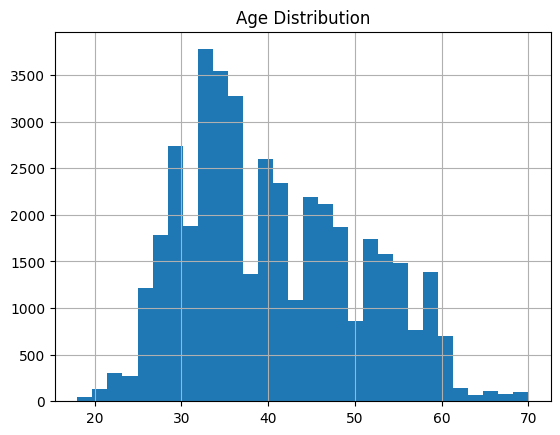

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualizing numerical features
data_frame['age'].hist(bins=30)
plt.title('Age Distribution')
plt.show()

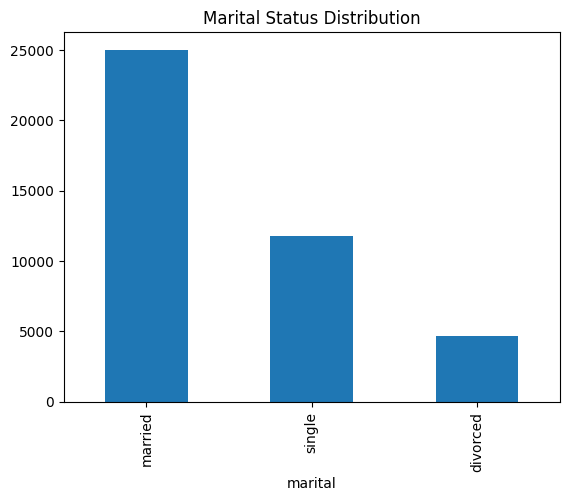

In [42]:
# Visualizing categorical features
data_frame['marital'].value_counts().plot(kind='bar')
plt.title('Marital Status Distribution')
plt.show()

C:\Users\legit\AppData\Local\Temp\ipykernel_12120\4289375655.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='y', y='dur', data=data_frame, palette='Set2')


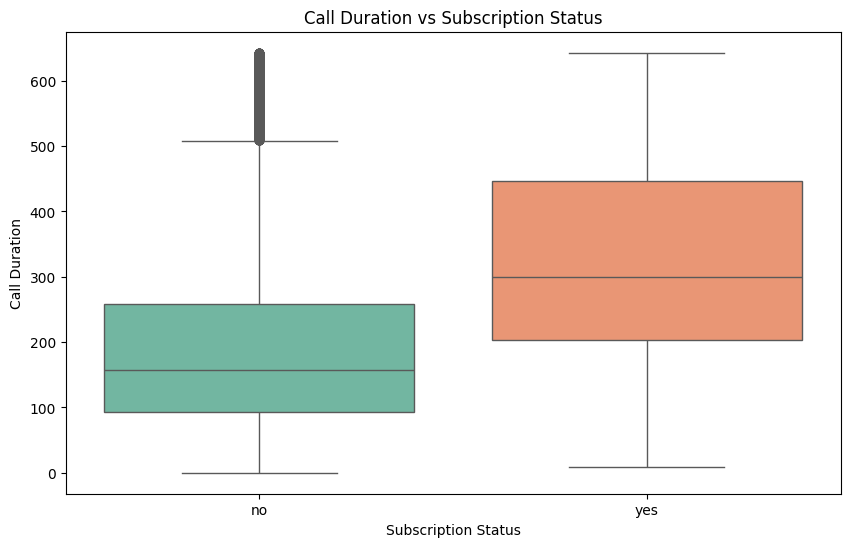

In [44]:
# Visualizing relationship between duration and subscription status
plt.figure(figsize=(10, 6))
sns.boxplot(x='y', y='dur', data=data_frame, palette='Set2')
plt.title('Call Duration vs Subscription Status')
plt.xlabel('Subscription Status')
plt.ylabel('Call Duration')
plt.show()

In [18]:
# List of categorical features to analyze
categorical_features = ['job', 'marital', 'education_qual', 'call_type', 'prev_outcome', 'y']

# Initialize lists to store frequency and percentage DataFrames
freq_tables = []
perc_tables = []

# Loop through categorical features and create frequency and percentage tables
for feature in categorical_features:
    # Calculate frequency counts
    freq_counts = data_frame[feature].value_counts()
    
    # Calculate percentage values
    percentages = (freq_counts / freq_counts.sum()) * 100
    
    # Create DataFrame for frequencies
    freq_table = pd.DataFrame({
        'Category': freq_counts.index,
        'Frequency': freq_counts.values
    })
    
    # Create DataFrame for percentages
    perc_table = pd.DataFrame({
        'Category': percentages.index,
        'Percentage (%)': percentages.values
    })
    
    # Rename columns
    freq_table.columns = ['Category', f'{feature} Frequency']
    perc_table.columns = ['Category', f'{feature} Percentage (%)']
    
    # Merge frequency and percentage tables
    combined_table = pd.merge(freq_table, perc_table, on='Category')
    
    # Append to lists
    freq_tables.append(combined_table)

# Concatenate all tables side by side
final_combined_table = pd.concat(freq_tables, axis=1)

# Set display options for better formatting
pd.set_option('display.width', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# Print the final combined table with borders
print(final_combined_table.to_string(index=False))

     Category  job Frequency  job Percentage (%) Category  marital Frequency  marital Percentage (%)  Category  education_qual Frequency  education_qual Percentage (%)  Category  call_type Frequency  call_type Percentage (%) Category  prev_outcome Frequency  prev_outcome Percentage (%) Category  y Frequency  y Percentage (%)
  blue-collar           9732           21.525735  married            27214.0               60.193316 secondary                   23202.0                      51.319369  cellular              29285.0                 64.774059  unknown                 36959.0                    81.747805       no      39922.0          88.30152
   management           9458           20.919688   single            12790.0               28.289576  tertiary                   13301.0                      29.419831   unknown              13020.0                 28.798301  failure                  4901.0                    10.840282      yes       5289.0          11.69848
   technician      

In [19]:
# Check for missing values
missing_data = data_frame.isnull().sum()

# Print missing values count
print("Missing Values per Column:")
print(missing_data)

Missing Values per Column:
age               0
job               0
marital           0
education_qual    0
call_type         0
day               0
mon               0
dur               0
num_calls         0
prev_outcome      0
y                 0
dtype: int64


In [21]:
# Calculate IQR for 'age'
Q1_age = data_frame['age'].quantile(0.25)
Q3_age = data_frame['age'].quantile(0.75)
IQR_age = Q3_age - Q1_age

# Define outliers for 'age'
outliers_age = data_frame[(data_frame['age'] < (Q1_age - 1.5 * IQR_age)) | (data_frame['age'] > (Q3_age + 1.5 * IQR_age))]

# Print outliers
print("Detected Outliers in 'age':")
print(outliers_age)


Detected Outliers in 'age':
       age            job   marital education_qual  call_type  day  mon   dur  \
29158   83        retired   married        primary  telephone    2  feb   912   
29261   75        retired  divorced        primary   cellular    2  feb   294   
29263   75        retired   married        primary   cellular    2  feb   149   
29322   83        retired   married       tertiary   cellular    2  feb   283   
29865   75        retired  divorced        primary   cellular    4  feb   136   
30225   72        retired   married        primary   cellular    5  feb   229   
30264   71        retired   married       tertiary   cellular    5  feb   531   
30908   76        retired   married        primary  telephone    9  feb    68   
31051   83        retired    single        primary  telephone   12  feb    89   
31052   71        retired   married        unknown  telephone   12  feb   139   
31055   85        retired   married        primary  telephone   12  feb   165   


In [22]:
# Calculate IQR for 'dur'
Q1_dur = data_frame['dur'].quantile(0.25)
Q3_dur = data_frame['dur'].quantile(0.75)
IQR_dur = Q3_dur - Q1_dur

# Define outliers for 'dur'
outliers_dur = data_frame[(data_frame['dur'] < (Q1_dur - 1.5 * IQR_dur)) | (data_frame['dur'] > (Q3_dur + 1.5 * IQR_dur))]

# Print outliers
print("Detected Outliers in 'dur':")
print(outliers_dur)

Detected Outliers in 'dur':
       age            job   marital education_qual  call_type  day  mon   dur  \
37      53     technician   married      secondary    unknown    5  may  1666   
43      54        retired   married      secondary    unknown    5  may  1492   
53      42         admin.    single      secondary    unknown    5  may   787   
59      46       services   married        primary    unknown    5  may  1778   
61      53     technician  divorced      secondary    unknown    5  may   812   
83      59         admin.   married      secondary    unknown    5  may  1042   
86      56         admin.   married      secondary    unknown    5  may  1467   
87      41     technician   married      secondary    unknown    5  may  1389   
109     45     management   married       tertiary    unknown    5  may   849   
130     55     management   married        unknown    unknown    5  may   677   
152     40     management   married       tertiary    unknown    5  may  2033   


In [24]:
# Remove outliers
data_frame = data_frame[~data_frame['age'].isin(outliers_age['age'])]
data_frame = data_frame[~data_frame['dur'].isin(outliers_dur['dur'])]


In [27]:
from sklearn.model_selection import train_test_split

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(
    data_frame.drop('y', axis=1),
    data_frame['y'],
    test_size=0.2,
    random_state=42
)

In [28]:
# Stratified splitting to maintain class distribution
X_train, X_test, y_train, y_test = train_test_split(
    data_frame.drop('y', axis=1),
    data_frame['y'],
    test_size=0.2,
    random_state=42,
    stratify=data_frame['y']
)

In [32]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.compose import make_column_selector as selector

# Define the preprocessing pipeline for numerical features
numerical_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),  # Handle missing values for numerical features
    ('scaler', StandardScaler())                 # Standardize numerical features
])

# Define the preprocessing pipeline for categorical features
categorical_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Handle missing values for categorical features
    ('onehot', OneHotEncoder(handle_unknown='ignore'))    # One-hot encode categorical features
])

# Define the ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_pipeline, selector(dtype_exclude=object)),  # Apply numerical pipeline to numerical features
        ('cat', categorical_pipeline, selector(dtype_include=object))  # Apply categorical pipeline to categorical features
    ]
)

# Preprocess the data
X_train_transformed = preprocessor.fit_transform(X_train)
X_test_transformed = preprocessor.transform(X_test)

In [33]:
# Initialize and train the Logistic Regression model
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train_transformed, y_train)

LogisticRegression(max_iter=1000)

In [35]:
from sklearn.ensemble import RandomForestClassifier

# Initialize and train the Random Forest model
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest.fit(X_train_transformed, y_train)

RandomForestClassifier(random_state=42)

In [38]:
# Model evaluation
# Predict on the test set
y_pred_log_reg = log_reg.predict(X_test_transformed)

# Evaluate the model
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_log_reg))
print("Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred_log_reg))

Logistic Regression Accuracy: 0.928390901432182
Logistic Regression Classification Report:
              precision    recall  f1-score   support

          no       0.94      0.99      0.96      7618
         yes       0.67      0.27      0.39       691

    accuracy                           0.93      8309
   macro avg       0.80      0.63      0.67      8309
weighted avg       0.92      0.93      0.91      8309



In [37]:
# Predict on the test set
y_pred_rf = random_forest.predict(X_test_transformed)

# Evaluate the model
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))

Random Forest Accuracy: 0.9300758213984835
Random Forest Classification Report:
              precision    recall  f1-score   support

          no       0.94      0.99      0.96      7618
         yes       0.66      0.32      0.43       691

    accuracy                           0.93      8309
   macro avg       0.80      0.65      0.70      8309
weighted avg       0.92      0.93      0.92      8309

